In [ ]:
import cv2
import numpy as np

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


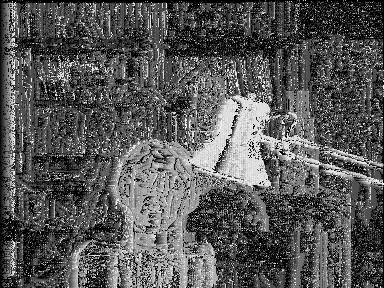

In [ ]:
IMG_PATH = "/content/drive/My Drive/Images/"

IMG_COLLECTION = IMG_PATH + "Tsukaba/"

height_img = 288
width_img = 384


def stereo_matching(left_img, right_img, disparity_range):
    left = cv2.imread(left_img, 0).astype(np.float32)
    right = cv2.imread(right_img, 0).astype(np.float32)

    cost_space = np.zeros((height_img, width_img, disparity_range), np.uint8)

    for d in range(disparity_range):
        left_d = left[:, d:width_img]
        right_d = right[:, 0 : width_img - d]
        cost_d = np.abs(left_d - right_d)
        cost_space[:, d:width_img, d] = cost_d

    scale = 255 / (disparity_range)
    depth = np.argmin(cost_space, axis=2)
    depth = depth * scale
    depth = depth.astype(np.uint8)

    cv2_imshow(depth)


left_img = IMG_COLLECTION + "left.png"
right_img = IMG_COLLECTION + "right.png"
disparity_range = 16

stereo_matching(left_img, right_img, disparity_range)

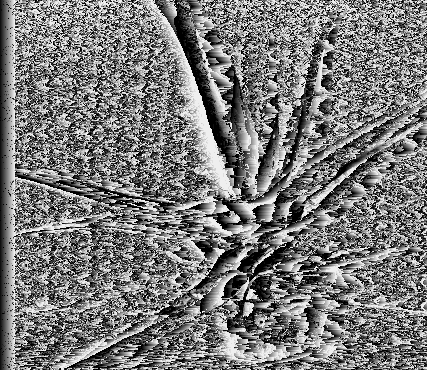

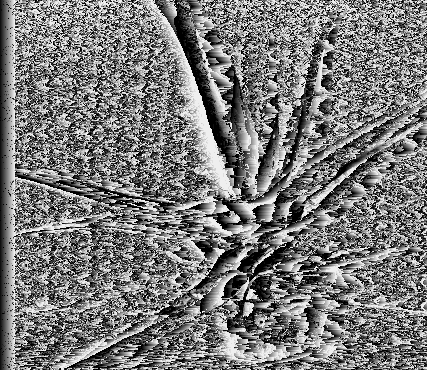

In [ ]:
IMG_ALOE = IMG_PATH + "Aloe/"

height_aloe = 370
width_aloe = 427


def stereo_matching_aloe(left_img, right_img, disparity_range):
    left = cv2.imread(left_img, 0).astype(np.float32)
    right = cv2.imread(right_img, 0).astype(np.float32)

    cost_space = np.zeros((height_aloe, width_aloe, disparity_range))

    for d in range(disparity_range):
        left_d = left[:, d:width_aloe]
        right_d = right[:, 0 : width_aloe - d]
        cost_d = (left_d - right_d) ** 2
        cost_space[:, d:width_aloe, d] = cost_d

    scale = 255 / (disparity_range)
    depth = np.argmin(cost_space, axis=2)
    depth = depth * scale
    depth = depth.astype(np.uint8)

    cv2_imshow(depth)


def stereo_matching_aloe_1(left_img, right_img, disparity_range):
    left = cv2.imread(left_img, 0).astype(np.float32)
    right = cv2.imread(right_img, 0).astype(np.float32)

    cost_space = np.zeros((height_aloe, width_aloe, disparity_range))

    for d in range(disparity_range):
        left_d = left[:, d:width_aloe]
        right_d = right[:, 0 : width_aloe - d]
        cost_d = np.abs(left_d - right_d)
        cost_space[:, d:width_aloe, d] = cost_d

    scale = 255 / (disparity_range)
    depth = np.argmin(cost_space, axis=2)
    depth = depth * scale
    depth = depth.astype(np.uint8)

    cv2_imshow(depth)


left = IMG_ALOE + "Aloe_left_1.png"
right1 = IMG_ALOE + "Aloe_right_1.png"
right2 = IMG_ALOE + "Aloe_right_2.png"
right3 = IMG_ALOE + "Aloe_right_3.png"

stereo_matching_aloe(left, right1, disparity_range)
stereo_matching_aloe_1(left, right1, disparity_range)

# stereo_matching_aloe(left, right2, disparity_range)
# stereo_matching_aloe(left, right3, disparity_range)

In [ ]:
aloe = cv2.imread(IMG_ALOE + "Aloe_left_1.png", 0)


def get_window(image, x, y, size):
    window = np.full((size, size), 255)
    half_size = (size) // 2
    for i in range(-half_size, half_size):
        for j in range(-half_size, half_size):
            x_window = x + j
            y_window = y + i
            if (
                x_window >= 0
                and x_window < image.shape[0]
                and y_window >= 0
                and y_window < image.shape[1]
            ):
                window[j, i] = image[y_window, x_window]
    return window


print(aloe[0:10, 0:10])
get_window(aloe, aloe.shape[0] // 2, aloe.shape[1] // 3, 5)

[[106 108 111 120 101 141 149 152 149 131]
 [ 97  95  86 119 108 121 151 144 119 109]
 [122 110  91 113 120  98 135 146 140 131]
 [142 142 120  93 116 113  99 130 149 147]
 [141 144 144 116  95 103 111 101 109 129]
 [123 131 136 128 114 100  87  96 114 109]
 [141 134 120 107 100 107 115 116 117 118]
 [113 107  97 111 119 109 107 114 121 123]
 [101  92 113 109 109 134 140 145 147 121]
 [109 114 109 119 146 154 141 118 118 110]]


array([[153, 158, 255, 159, 157],
       [138, 161, 255, 157, 133],
       [255, 255, 255, 255, 255],
       [107, 105, 255, 137, 139],
       [153, 120, 255, 139, 158]])

In [ ]:
from skimage.feature import hog
import numpy as np

image_height = 48
image_width = 48
window_size = 24
window_step = 5


def sliding_hog_windows(image):
    hog_vector = []
    for y in range(0, image_height, window_step):
        for x in range(0, image_width, window_step):
            window = image[y : y + window_size, x : x + window_size]
            hog_vector.extend(
                hog(
                    window,
                    orientations=8,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1),
                )
            )
    return hog_vector


# image = np.load('image.npy')
hog_vector = sliding_hog_windows(aloe)
print(hog_vector)

[0.3779795033390158, 0.21518697263817102, 0.3779795033390158, 0.3779795033390158, 0.3779795033390158, 0.3779795033390158, 0.3779795033390158, 0.3106179917248729, 0.3709067407040331, 0.3709067407040331, 0.3709067407040331, 0.3709067407040331, 0.1923468938097212, 0.3709067407040331, 0.3709067407040331, 0.3709067407040331, 0.42890271007709224, 0.16872697770441347, 0.42890271007709224, 0.42890271007709224, 0.42890271007709224, 0.25238488895191796, 0.16092690754377598, 0.38223744707454876, 0.2852212748253276, 0.3915398934036425, 0.3915398934036425, 0.31120603953409653, 0.3915398934036425, 0.3915398934036425, 0.23512163730414082, 0.3915398934036425, 0.3763049296637164, 0.3763049296637164, 0.3763049296637164, 0.3763049296637164, 0.23078107669968612, 0.3763049296637164, 0.3763049296637164, 0.3116210739793319, 0.3233756945763241, 0.17629161483022493, 0.39027251012337894, 0.39027251012337894, 0.39027251012337894, 0.39027251012337894, 0.39027251012337894, 0.3206029718000681, 0.3633957789381996, 0